# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.216107e+01     1.456738e+01
 * time: 0.0077610015869140625
     1     6.252035e+01     1.049473e+01
 * time: 0.017221927642822266
     2     5.656391e+01     1.405225e+01
 * time: 0.03939008712768555
     3     4.218169e+01     1.005626e+01
 * time: 0.19840407371520996
     4     3.396485e+01     8.990632e+00
 * time: 0.22738099098205566
     5     1.446098e+01     3.105468e+00
 * time: 0.256990909576416
     6     1.081016e+01     3.325383e+00
 * time: 0.27835512161254883
     7     9.289563e+00     2.699982e+00
 * time: 0.29990410804748535
     8     7.540450e+00     3.873709e+00
 * time: 0.3251960277557373
     9     6.775123e+00     2.023287e+00
 * time: 0.3508150577545166
    10     6.290689e+00     2.381119e+00
 * time: 0.37261390686035156
    11     6.003062e+00     1.199632e+00
 * time: 0.3965339660644531
    12     5.825473e+00     1.556960e+00
 * time: 0.4190549850463867
    13     5.726260e+00     1.100743e+00
 * time: 0.

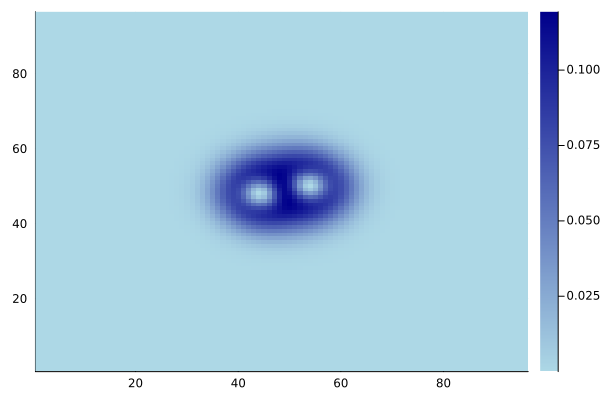

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)